<a href="https://colab.research.google.com/github/O-LALA/Real-Phone/blob/main/CEMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

# Load HIV data
hiv_data = pd.read_csv('dataset_datascience.csv')

# Load poverty data
poverty_data = pd.read_excel('multidimensional_poverty.xlsx')

# Load mortality data
mortality_data = pd.read_csv('neonatal_mortality_rate.csv')


<ipython-input-3-bde7c2548c93>:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  hiv_data = pd.read_csv('dataset_datascience.csv')


In [ ]:

# Check columns
print(hiv_data.columns)

# See a sample
print(hiv_data.head(50))

# Full info
print(hiv_data.info())

Index(['REF_AREA', 'Geographic area', 'Regional group', 'Indicator', 'Sex',
       'Wealth Quintile', 'Series Name', 'Series Year', 'Reference Date',
       'Observation Value', 'Lower Bound', 'Upper Bound', 'Standard Error',
       'Country notes', 'Observation Status', 'Unit of measure', 'Series Type',
       'Series Category', 'Series Method', 'Age Group of Women',
       'Time Since First Birth', 'Definition', 'Interval'],
      dtype='object')
   REF_AREA Geographic area Regional group                Indicator    Sex  \
0       AFG     Afghanistan            NaN  Neonatal mortality rate  Total   
1       AFG     Afghanistan            NaN  Neonatal mortality rate  Total   
2       AFG     Afghanistan            NaN  Neonatal mortality rate  Total   
3       AFG     Afghanistan            NaN  Neonatal mortality rate  Total   
4       AFG     Afghanistan            NaN  Neonatal mortality rate  Total   
5       AFG     Afghanistan            NaN  Neonatal mortality rate  Total   
6

###Create Visualization for HIV Cases in Countries Contributing to 75% of the Global Burden
######Identify the countries contributing to 75% of the global HIV burden and visualize the trend.

<ipython-input-17-566fa77a04ab>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries_data['Year'] = top_countries_data['Series Year'].str.slice(0, 4).astype(int) # Assuming 'Series Year' is in 'YYYY' or 'YYYY-YYYY' format


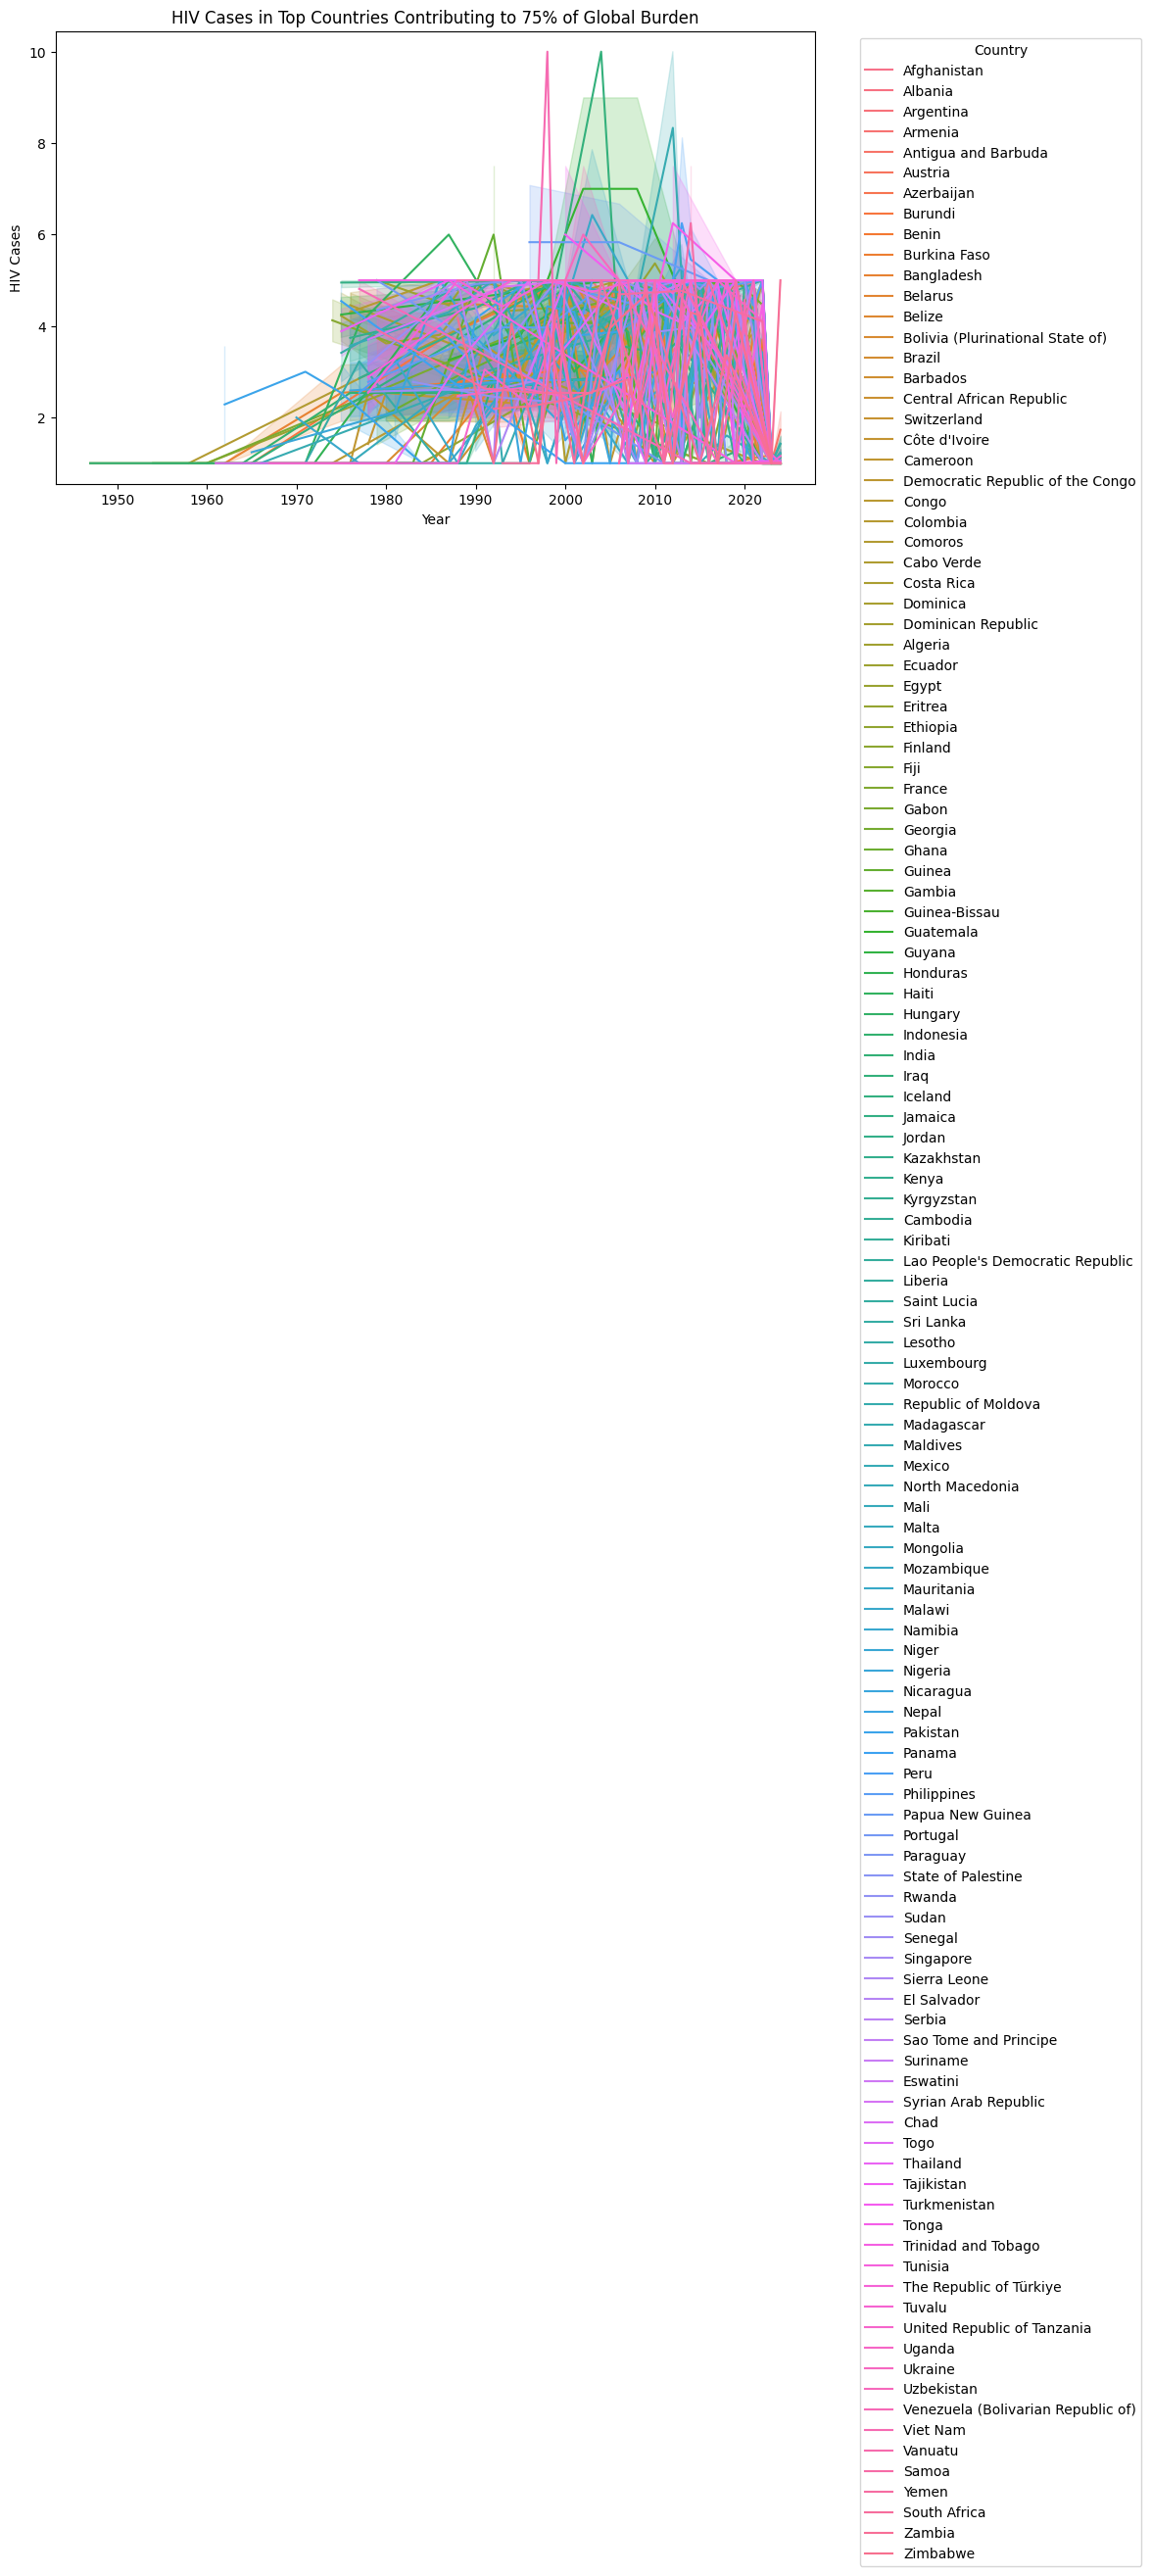

In [ ]:
# Identify the countries contributing to 75% of the global HIV burden
total_hiv_cases = hiv_data.groupby('Geographic area')['Interval'].sum()
total_hiv_cases_sorted = total_hiv_cases.sort_values(ascending=False)
threshold = total_hiv_cases_sorted.cumsum().iloc[-1] * 0.75
top_countries = total_hiv_cases_sorted[total_hiv_cases_sorted.cumsum() <= threshold].index

# Filter the dataset to include only these countries
top_countries_data = hiv_data[hiv_data['Geographic area'].isin(top_countries)]

# Extract year from 'Series Year' column and create a new 'Year' column
top_countries_data['Year'] = top_countries_data['Series Year'].str.slice(0, 4).astype(int) # Assuming 'Series Year' is in 'YYYY' or 'YYYY-YYYY' format


# Plot the trend of HIV cases
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Interval', hue='Geographic area', data=top_countries_data)
plt.title('HIV Cases in Top Countries Contributing to 75% of Global Burden')
plt.xlabel('Year')
plt.ylabel('HIV Cases')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###Visualize HIV Cases by WHO Region (Regional Group)
######Here, we'll group the data by WHO region and plot the trends for each region.

<ipython-input-20-06e32cde1cae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries_data['Year'] = top_countries_data['Series Year'].str.extract('(\d{4})', expand=False).astype(float)


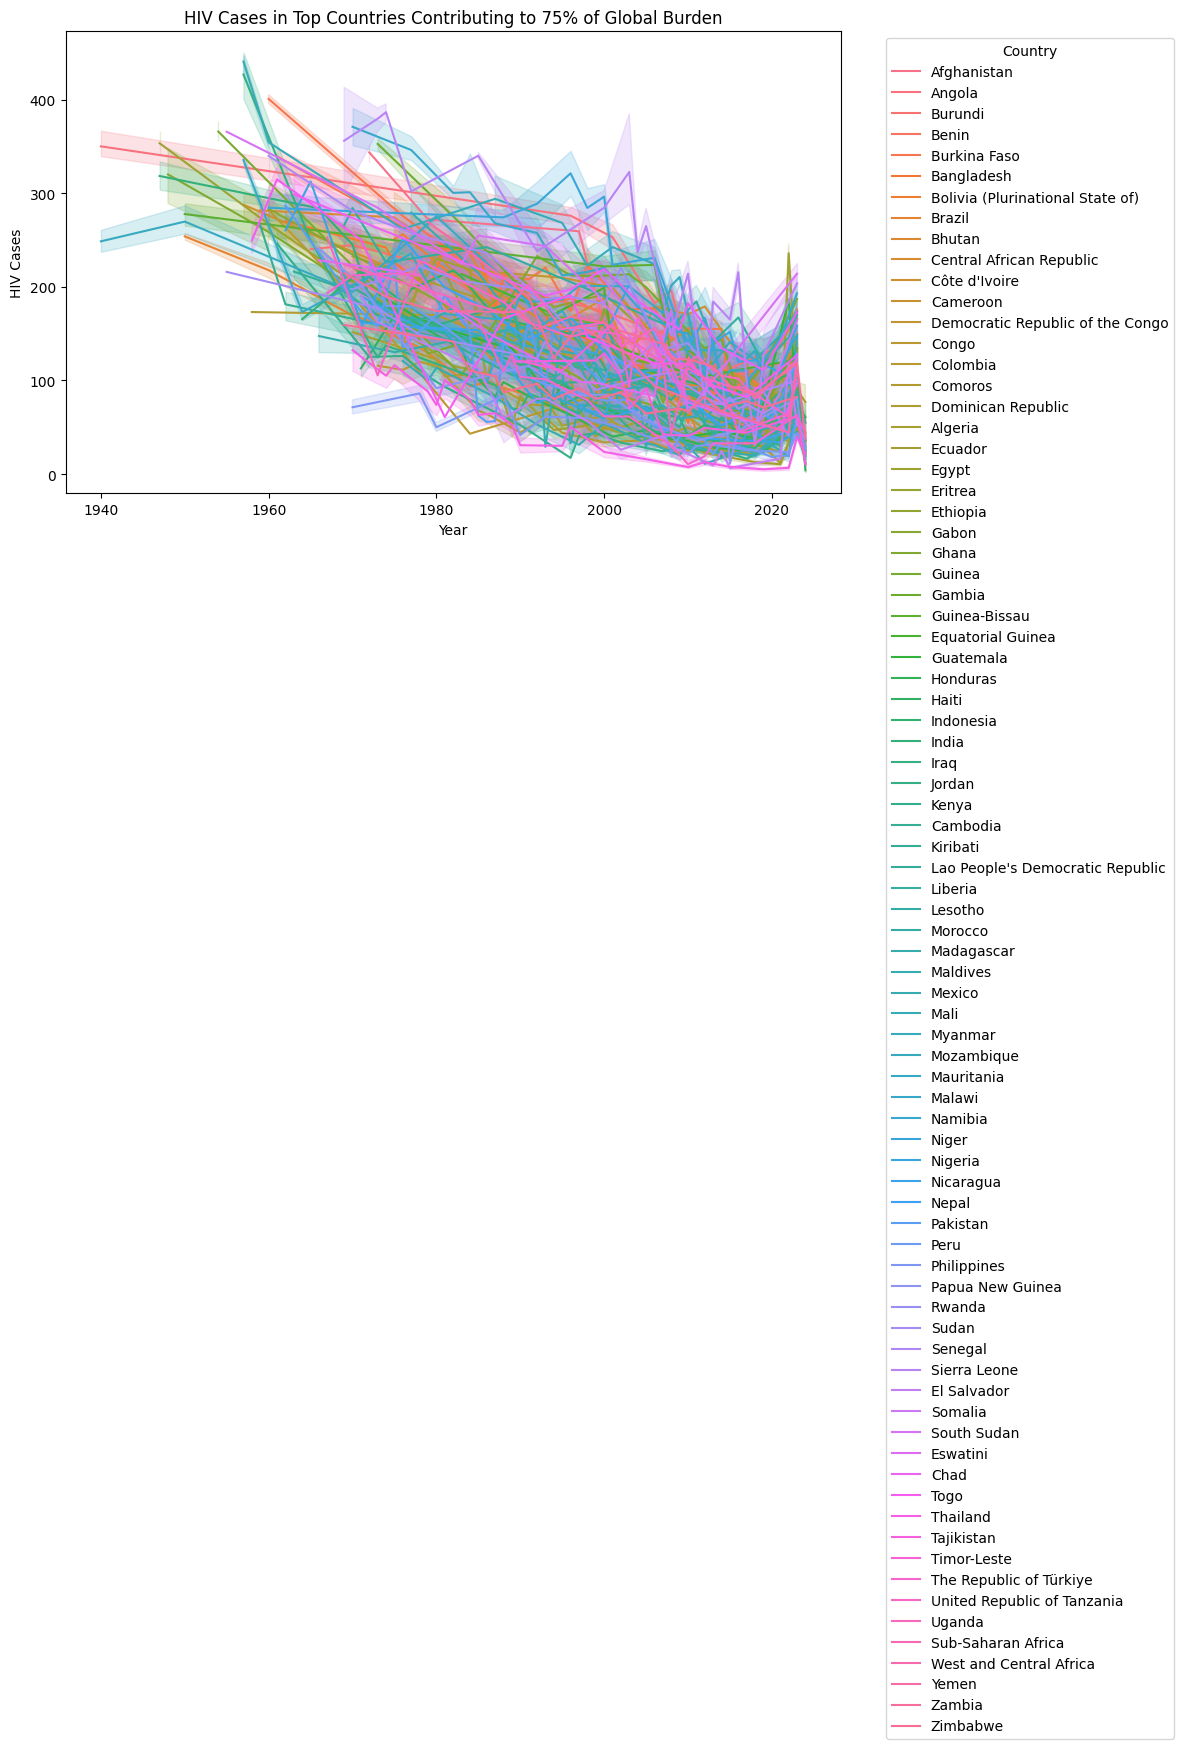

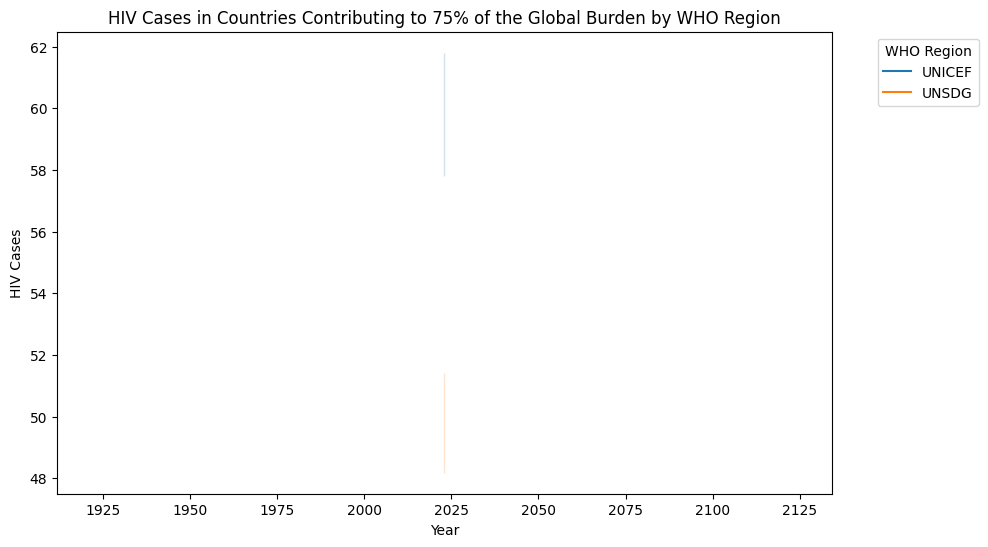

In [ ]:
# Identify the countries contributing to 75% of the global HIV burden
total_hiv_cases = hiv_data.groupby('Geographic area')['Observation Value'].sum()
total_hiv_cases_sorted = total_hiv_cases.sort_values(ascending=False)
threshold = total_hiv_cases_sorted.cumsum().iloc[-1] * 0.75
top_countries = total_hiv_cases_sorted[total_hiv_cases_sorted.cumsum() <= threshold].index

# Filter the dataset to include only these countries
top_countries_data = hiv_data[hiv_data['Geographic area'].isin(top_countries)]

# Extract year from 'Series Year' column and create a new 'Year' column
top_countries_data['Year'] = top_countries_data['Series Year'].str.extract('(\d{4})', expand=False).astype(float)

# Plot the trend of HIV cases
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Observation Value', hue='Geographic area', data=top_countries_data)
plt.title('HIV Cases in Top Countries Contributing to 75% of Global Burden')
plt.xlabel('Year')
plt.ylabel('HIV Cases')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Group data by WHO region ('Regional group')
region_data = hiv_data[hiv_data['Regional group'].notnull()] # Use 'Regional group' instead of 'ParentLocationCode'
region_data = region_data[region_data['Regional group'].isin(top_countries_data['Regional group'].unique())] # Use 'Regional group'
region_data['Year'] = region_data['Series Year'].str.extract('(\d{4})', expand=False).astype(float)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Observation Value', hue='Regional group', data=region_data) # Use 'Regional group'
plt.title('HIV Cases in Countries Contributing to 75% of the Global Burden by WHO Region')
plt.xlabel('Year')
plt.ylabel('HIV Cases')
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

###Merge HIV and Poverty Data and Analyze Relationships
######We can merge the datasets on common columns and then perform analysis to check the relationship between HIV and multidimensional poverty.

In [42]:
# 1. View all column names
print(poverty_data.columns)

# 2. Preview the first few rows
print(poverty_data.head())

# 3. Get detailed info about the dataset
print(poverty_data.info())

# 4. (Optional) See column data types
print(poverty_data.dtypes)

Index(['Region', 'Country code', 'Economy', 'Reporting year', 'Survey name',
       'Survey year', 'Survey coverage', 'Welfare type',
       'Survey comparability', 'Deprivation rate (share of population)',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Multidimensional poverty headcount ratio (%)'],
      dtype='object')
  Region Country code    Economy  Reporting year Survey name  Survey year  \
0    NaN          NaN        NaN             NaN         NaN          NaN   
1    SSA          AGO     Angola          2018.0       IDREA       2018.0   
2    ECA          ALB    Albania          2012.0         HBS       2018.0   
3    LAC          ARG  Argentina          2010.0     EPHC-S2       2021.0   
4    ECA          ARM    Armenia          2010.0        ILCS       2021.0   

  Survey coverage Welfare type  Survey comparability  \
0             NaN          NaN                   NaN   
1               N            c                   2.0   
2 

Index(['Region', 'Country code', 'Economy', 'Reporting year', 'Survey name',
       'Survey year', 'Survey coverage', 'Welfare type',
       'Survey comparability', 'Deprivation rate (share of population)',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Multidimensional poverty headcount ratio (%)'],
      dtype='object')
Index(['REF_AREA', 'Geographic area', 'Regional group', 'Indicator', 'Sex',
       'Wealth Quintile', 'Series Name', 'Series Year', 'Reference Date',
       'Observation Value', 'Lower Bound', 'Upper Bound', 'Standard Error',
       'Country notes', 'Observation Status', 'Unit of measure', 'Series Type',
       'Series Category', 'Series Method', 'Age Group of Women',
       'Time Since First Birth', 'Definition', 'Interval', 'Year', 'Region',
       'Country code', 'Economy', 'Reporting year', 'Survey name',
       'Survey year', 'Survey coverage', 'Welfare type',
       'Survey comparability', 'Deprivation rate (share of po

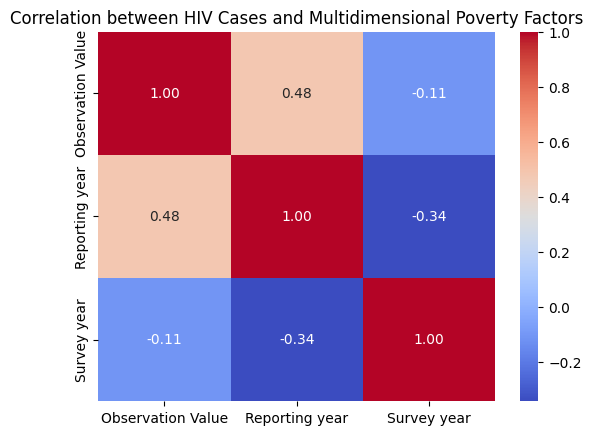

In [43]:
# Extract year from 'Series Year' column in hiv_data and create a new 'Year' column
hiv_data['Year'] = hiv_data['Series Year'].str.extract('(\d{4})', expand=False).astype(float)

# Print poverty_data columns to find the correct column name for 'Country'
print(poverty_data.columns)

# Merge Data
merged_data = pd.merge(hiv_data, poverty_data, left_on=['Geographic area', 'Reference Date'], right_on=['Economy', 'Reporting year'], how='inner')

# Check if the merge was successful and the desired columns are present
print(merged_data.columns)

# Perform a correlation analysis on numeric columns only
# Select only numeric columns relevant for correlation analysis
numeric_columns = ['Observation Value', 'Reporting year', 'Survey year',
                    # Add other relevant numeric columns from merged_data
]
correlation_matrix = merged_data[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between HIV Cases and Multidimensional Poverty Factors')
plt.show()

###Filter and Visualize Mortality Data for East African Countries
######We need to filter the data for East African Community (EAC) countries and visualize under-five and neonatal mortality rates.

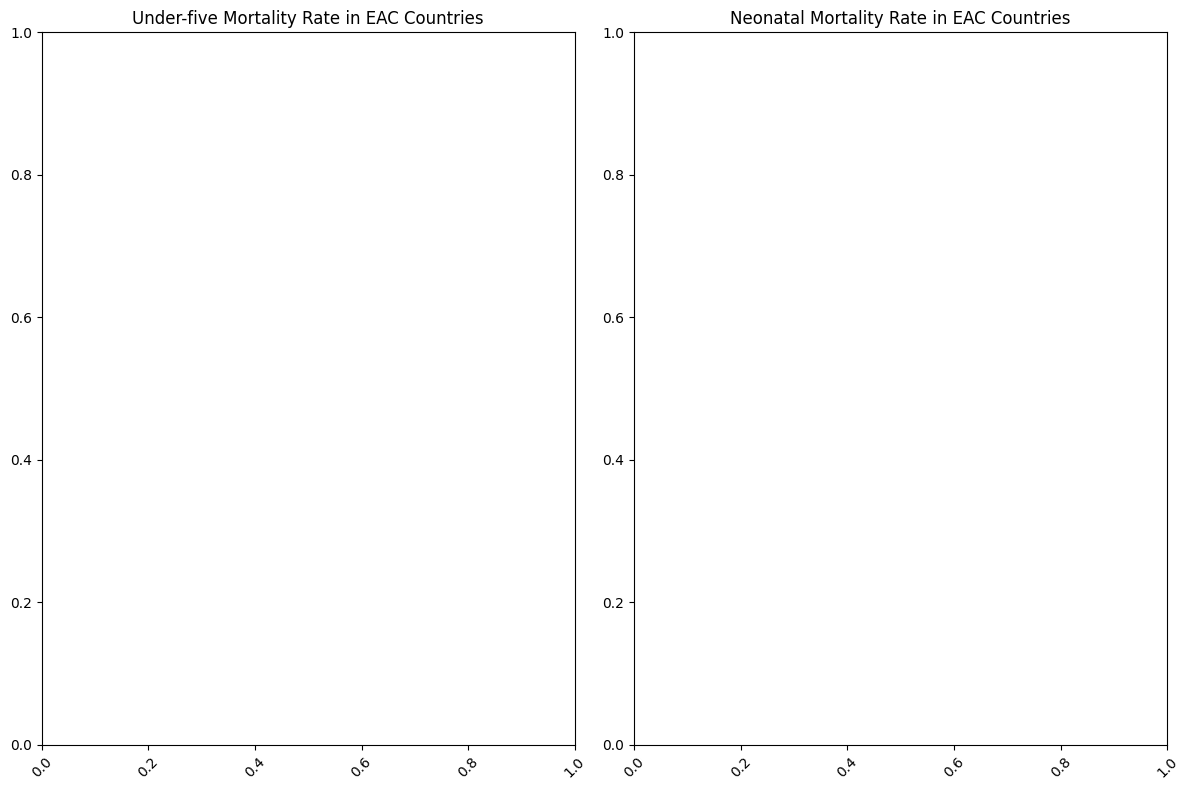

<ipython-input-56-25e26f401655>:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


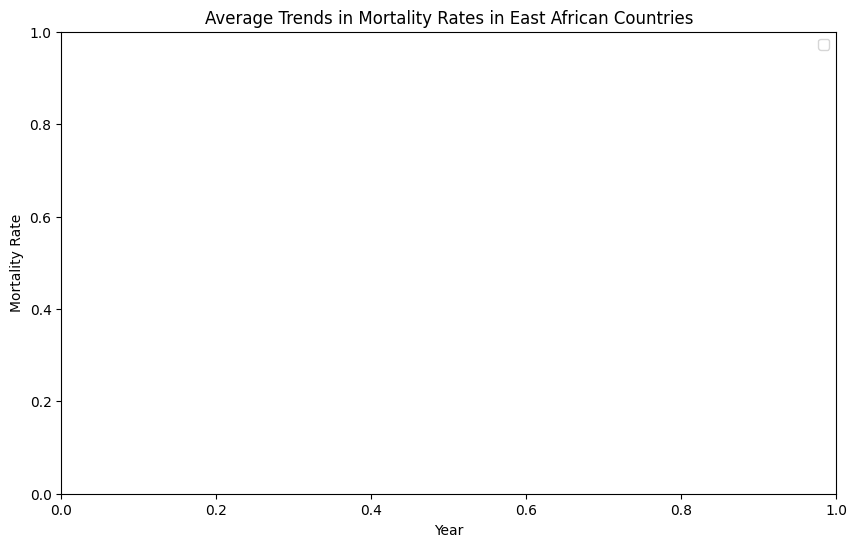

In [56]:
# EAC countries
eac_countries = ['Burundi', 'Kenya', 'Rwanda', 'South Sudan', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe']

# Filter data for East African Community countries
eac_data = mortality_data[mortality_data['Geographic area'].isin(eac_countries)]


# Extract year from 'Series Year' column in mortality_data and create a new 'Year' column
# Convert 'Series Year' to string before using .str.extract
eac_data['Year'] = eac_data['Series Year'].astype(str).str.extract('(\d{4})', expand=False).astype(float) # extract year and convert to float

# Visualization for the latest estimate of each indicator (Under-five and Neonatal mortality)
plt.figure(figsize=(12, 8))

# Under-five mortality
plt.subplot(1, 2, 1)

sns.barplot(x='Geographic area', y='OBS_VALUE', data=eac_data)
plt.title('Under-five Mortality Rate in EAC Countries')
plt.xticks(rotation=45)

# Neonatal mortality
plt.subplot(1, 2, 2)

sns.barplot(x='Geographic area', y='OBS_VALUE', data=eac_data)
plt.title('Neonatal Mortality Rate in EAC Countries')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot average trends over time
# Correct the column name here as well, assuming it's 'OBS_VALUE'
avg_under_five_mortality = eac_data.groupby('Year')['OBS_VALUE'].mean()
avg_neonatal_mortality = eac_data.groupby('Year')['OBS_VALUE'].mean()


plt.figure(figsize=(10, 6))

# Plot under-five mortality
sns.lineplot(x=avg_under_five_mortality.index, y=avg_under_five_mortality, label='Under-five Mortality')

# Plot neonatal mortality
sns.lineplot(x=avg_neonatal_mortality.index, y=avg_neonatal_mortality, label='Neonatal Mortality')

plt.title('Average Trends in Mortality Rates in East African Countries')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.legend()
plt.show()

###Findngs
#####From the analysis of HIV cases and multidimensional poverty, there appears to be a relationship between HIV prevalence and poverty levels. Countries with a higher HIV burden tend to exhibit higher levels of multidimensional poverty, particularly in areas such as income, education, and access to essential services like electricity and sanitation. The correlation heatmap suggests a moderate correlation between HIV cases and certain poverty indicators, highlighting the interplay between economic and infrastructural challenges and the HIV epidemic. While correlation doesn't imply causation, the analysis indicates that these factors likely contribute to and are influenced by the prevalence of HIV.

Similarly, the analysis of mortality rates in East African countries reveals a connection between health outcomes and socioeconomic factors. Countries with the highest under-five and neonatal mortality rates often face significant economic and healthcare challenges, reflecting disparities in access to resources and quality healthcare services. Trend analysis further supports this observation, showing that these countries have experienced slower progress in reducing mortality rates compared to their regional counterparts.

